### WE have sales data of bike buyers in 3 regions Pacific and NorthAmerica and Europe , we are trying to find what are the factros that are effecting the sales and trying to build a MLmodel that predict the data 


![MAPs](https://www.diageo.com/PR1346/aws/media/2258/map_world.png)

In [42]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score, confusion_matrix, roc_curve, recall_score, precision_score, f1_score 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 

In [2]:
traindata=pd.read_csv("Traindata.csv")
traindata.head()

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,BikeBuyer
0,22711,Single,Male,30000,0,Partial College,Clerical,No,1,0-1 Miles,Europe,33,Yes
1,13555,Married,Female,40000,0,Graduate Degree,Clerical,Yes,0,0-1 Miles,Europe,37,Yes
2,2,Single,Male,160000,0,Graduate Degree,Management,Yes,2,0-1 Miles,Pacific,47,No
3,25410,Single,Female,70000,2,Bachelors,Skilled Manual,No,1,0-1 Miles,North America,38,Yes
4,21008,Single,Female,20000,1,Partial College,Manual,No,0,0-1 Miles,Europe,46,Yes


In [3]:
traindata.info() # getting the information of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7002 non-null   int64 
 1   Marital Status    7002 non-null   object
 2   Gender            7002 non-null   object
 3   Yearly Income     7002 non-null   int64 
 4   Children          7002 non-null   int64 
 5   Education         7002 non-null   object
 6   Occupation        7002 non-null   object
 7   Home Owner        7002 non-null   object
 8   Cars              7002 non-null   int64 
 9   Commute Distance  7002 non-null   object
 10  Region            7002 non-null   object
 11  Age               7002 non-null   int64 
 12  BikeBuyer         7002 non-null   object
dtypes: int64(5), object(8)
memory usage: 711.3+ KB


In [4]:
traindata.isna().sum() # we have no missing values 

ID                  0
Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
BikeBuyer           0
dtype: int64

In [5]:
traindata.describe() # taking a look at the all numnerical data components 

,ID,Yearly Income,Children,Cars,Age
count,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000
mean,20015.503142,55245.644102,1.157098,1.621394,45.257355
std,5443.294458,32978.217766,1.634910,1.199397,11.683858
min,2.000000,10000.000000,0.000000,0.000000,25.000000
25%,15130.250000,30000.000000,0.000000,1.000000,36.000000
50%,20086.500000,60000.000000,0.000000,2.000000,43.000000
75%,24754.750000,70000.000000,2.000000,2.000000,53.000000
max,29476.000000,170000.000000,5.000000,4.000000,96.000000


In [6]:
traindata.shape # shape of the data 

(7002, 13)

In [7]:
 # Assuming the income would the varying according the age lets see how they are related 
    
correlation = traindata["Yearly Income"].corr(traindata["Age"])

correlation 

0.12230516436059201

In [8]:
# lets see the correlations of the all the numericals inthe data 
corr=traindata.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Yearly Income,Children,Cars,Age
ID,1.000000,-0.052431,-0.004701,0.114397,0.038655
Yearly Income,-0.052431,1.000000,0.448513,0.477096,0.122305
Children,-0.004701,0.448513,1.000000,0.441968,-0.081783
Cars,0.114397,0.477096,0.441968,1.000000,0.093694
Age,0.038655,0.122305,-0.081783,0.093694,1.000000


<AxesSubplot:xlabel='BikeBuyer', ylabel='Yearly Income'>

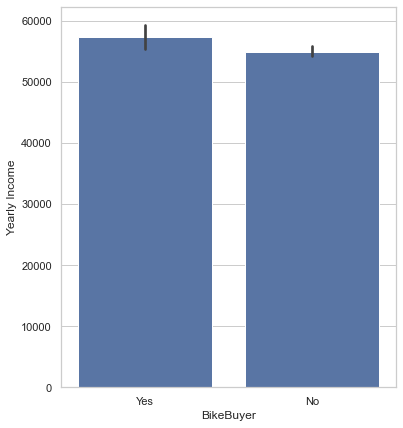

In [9]:
# Assuming the income would the prime criteria on a Purchase of bike 
#lets see all the incomes and bike purchases 
    
# setting the theme to whitefeild 
sns.set_theme(style="whitegrid") 

# intitalizing the figure 
plt.figure(figsize=(6, 7))

# plotting the graph 
sns.barplot(x="BikeBuyer", y="Yearly Income", data=traindata,
            label="Total", color="b")

In [10]:
# finding the univarient analysis 
# for martistatus and gender 

status=traindata["Marital Status"].value_counts(normalize=True).reset_index()
status.rename(columns={"index":"Marital Status","Marital Status":"Percentile"})

,Marital Status,Percentile
0,Married,0.56641
1,Single,0.43359


In [11]:
Gender=traindata["Gender"].value_counts(normalize=False).reset_index()
Gender.rename(columns={"index":"Sex","Gender":"Percentile"})


,Sex,Percentile
0,Male,3579
1,Female,3423


<AxesSubplot:xlabel='Occupation'>

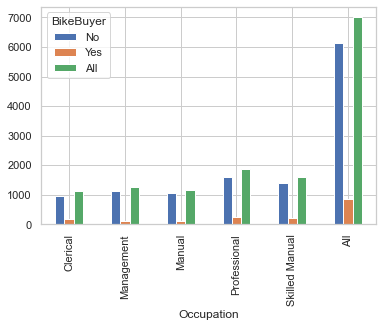

In [12]:
# using the corsstabs for the bivarient analysis 
table1=pd.crosstab(traindata["Occupation"],traindata["BikeBuyer"],margins=True)
# making a graph
table1.plot(kind="bar")

<AxesSubplot:xlabel='Region'>

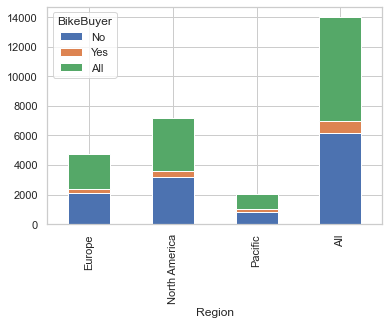

In [13]:
# using a crosstab for region and bike buyers
table2=pd.crosstab(traindata["Region"],traindata["BikeBuyer"],margins=True)
# making a graph 
table2.plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='Region,Occupation'>

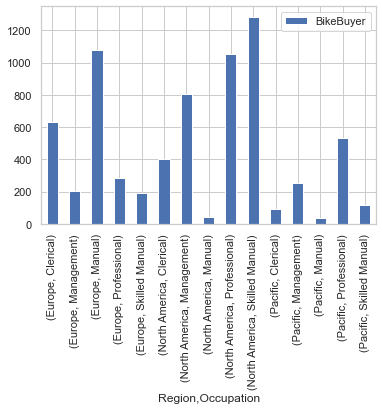

In [14]:
# using group by fucntion to group by region,occupatin and commute distence 
table3=traindata[["BikeBuyer","Region","Occupation"]].groupby(by=["Region","Occupation"])

#looking at the data
table=table3.count()


#plotting the graph 
table.plot(kind="bar",stacked=True)

# observing northamerican skilled employees have bough more bikes 

<AxesSubplot:xlabel='BikeBuyer'>

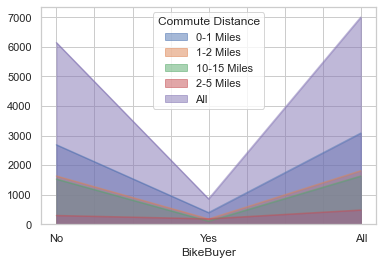

In [15]:
#letrs undrstnd how the traveldistence and purchses are related 
table4=pd.crosstab(traindata["BikeBuyer"],traindata["Commute Distance"],margins=True)

#Plotting a graph 
table4.plot(kind="area",stacked=False)

#observing that people tevelling less then 1 mile have more bike purchases 

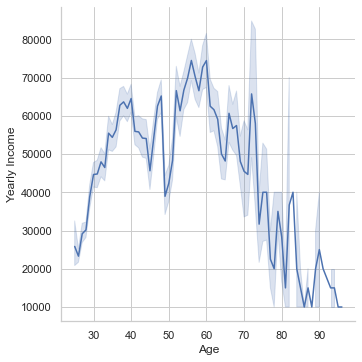

In [16]:
# assuming that age income are related lets see the how they are effected by each other 
# we are using the regression plots from seaborn

sns.relplot(x="Age", y="Yearly Income", kind="line", data=traindata)

# income seems to be growing uptill age of 60 and then falling down 

In [17]:
# lets findwhich occupation has more income  
inc_occ=traindata.groupby("Occupation")["Yearly Income"].mean()
avg_inc_occ=pd.DataFrame(inc_occ)
avg_inc_occ.idxmax()

# so People who are occupied as Managements have max income 

Yearly Income    Management
dtype: object

In [18]:
# lets find the average age of all the customers in the diffrent occupations 
age_occ=traindata.groupby("Occupation")["Age"].mean()
avg_age_occ=pd.DataFrame(age_occ)
avg_age_occ

,Age
Occupation,
Clerical,45.076581
Management,53.536934
Manual,40.973958
Professional,45.517352
Skilled Manual,41.637618


In [19]:
#lets also find the average income of all the customers 
# groupping by region and occupation 

table5=traindata.groupby(by=["Region","Occupation"])["Yearly Income"].mean()
table5=pd.DataFrame(table5)
table5 #.idxmax()


Yearly Income
Region        Occupation                   
Europe        Clerical         29239.302694
              Management      116029.411765
              Manual           15408.163265
              Professional    103639.575972
              Skilled Manual   44684.210526
North America Clerical         31990.049751
              Management       82848.258706
              Manual           18250.000000
              Professional     64834.123223
              Skilled Manual   53276.264591
Pacific       Clerical         22555.555556
              Management       95019.920319
              Manual           10588.235294
              Professional     77102.803738
              Skilled Manual   47750.000000

In [20]:
# lets find the bikebuyers depending on income and commute distence 
table6=traindata.groupby(["BikeBuyer","Commute Distance"])["Yearly Income"].mean()
table6=pd.DataFrame(table6)
table6

Yearly Income
BikeBuyer Commute Distance               
No        0-1 Miles          46270.934127
          1-2 Miles          49644.607843
          10-15 Miles        75828.421742
          2-5 Miles          55420.875421
Yes       0-1 Miles          52284.263959
          1-2 Miles          48988.764045
          10-15 Miles        81456.310680
          2-5 Miles          62608.695652

In [21]:
# lets find how homeowners are related based in their income and marital status 
table7=traindata.groupby(["Home Owner","Marital Status"])["Yearly Income"].mean()
table7=pd.DataFrame(table7)
table7

Yearly Income
Home Owner Marital Status               
No         Married          49351.955307
           Single           53107.861060
Yes        Married          60784.760664
           Single           49347.670251

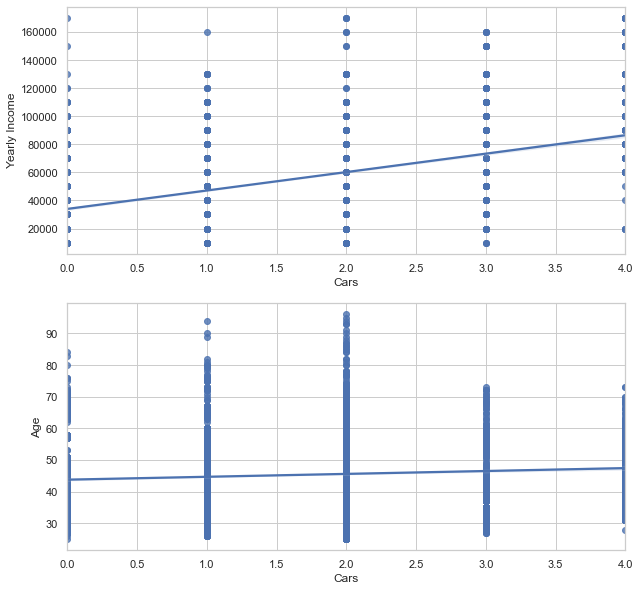

In [22]:
# lets how the incomes and numbers of cars are realted 
# we would be using the regression plots again 

# initiating the figure size 
plt.figure(figsize=(10,10))

# creating subplot 
plt.subplot(2,1,1,)

# plotting the graph 
sns.regplot(x="Cars", y="Yearly Income", data=traindata)

plt.subplot(2,1,2)
sns.regplot(x="Cars", y="Age", data=traindata)

# display the graph 
plt.show()


In [28]:
# Now lets convert all the data into numerical data 
# we will be one labelencoding 
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# changind the all the catagorical values into numerical 
traindata["Sex"]=label_encoder.fit_transform(traindata.Gender)
traindata["Relation"]=label_encoder.fit_transform(traindata["Marital Status"] )
traindata["Study"]=label_encoder.fit_transform(traindata.Education)
traindata["Work"]=label_encoder.fit_transform(traindata.Occupation)
traindata["OwnHouse"]=label_encoder.fit_transform(traindata["Home Owner"])
traindata["Region"]=label_encoder.fit_transform(traindata.Region)
traindata["Sales"]=label_encoder.fit_transform(traindata.BikeBuyer)
traindata["Trevel distence"]=label_encoder.fit_transform(traindata["Commute Distance"])

# dropping all the previous catagorical values 
train=traindata.drop(["Gender","Marital Status","Education","Occupation","Region","BikeBuyer","Commute Distance","ID","Home Owner"],axis=1)

In [29]:
train.head()

,Yearly Income,Children,Cars,Age,Sex,Relation,Study,Work,OwnHouse,Sales,Trevel distence
0,30000,0,1,33,1,1,3,0,0,1,0
1,40000,0,0,37,0,0,1,0,1,1,0
2,160000,0,2,47,1,1,1,1,1,0,0
3,70000,2,1,38,0,1,0,4,0,1,0
4,20000,1,0,46,0,1,3,2,0,1,0


In [31]:
# model building 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC



In [32]:
# scaling the data 
train_scaled=StandardScaler().fit_transform(train.drop(["Sales"],axis="columns"))

In [33]:
x_train,x_test,y_train,y_test=train_test_split(train_scaled,train.Sales,random_state=123,test_size=0.2)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5601, 10)
(1401, 10)
(5601,)
(1401,)


accuracy Score: 87.72305496074233
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93      1400
           1       0.00      0.00      0.00         1

    accuracy                           0.88      1401
   macro avg       0.50      0.44      0.47      1401
weighted avg       1.00      0.88      0.93      1401

roc_auc_score: 43.892857142857146


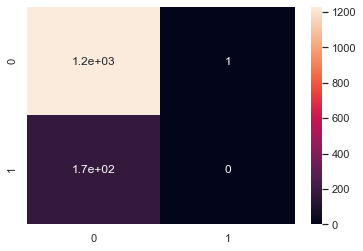

In [49]:
#creating a logistic regression model 
lr=LogisticRegression()
#fitting the model to train data 
lr_fit=lr.fit(x_train,y_train)
#predict the the x_test values to the 
lr_pred=lr.predict(x_test)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,lr_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# printing the accuracy score 
print("accuracy Score:",accuracy_score(lr_pred,y_test)*100)
# classification report 
print("Classification report:\n",classification_report (lr_pred,y_test))
# ROC-AUC SCore 
print("roc_auc_score:",roc_auc_score(lr_pred,y_test)*100)

In [51]:
# lets create a dictionory to collect all the results 
lr_model_vales=dict(accuracy=accuracy_score(lr_pred,y_test)*100,Auc_score=roc_auc_score(lr_pred,y_test)*100
                   ,recall=recall_score(lr_pred,y_test),
                   precision=precision_score(lr_pred,y_test),
                   f1_score=f1_score(lr_pred,y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1375
           1       0.06      0.38      0.10        26

    accuracy                           0.87      1401
   macro avg       0.52      0.63      0.52      1401
weighted avg       0.97      0.87      0.92      1401



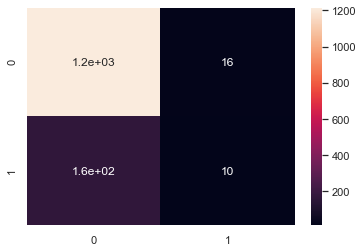

In [53]:
# model for Navi_byes 
nv=GaussianNB()
#fitting the model to train data 
nv_fit=nv.fit(x_train,y_train)
#predict the the x_test values to the 
nv_pred=nv.predict(x_test)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,nv_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# classification report 
print("Classification report:\n",classification_report (nv_pred,y_test))



In [54]:
nv_model_vales=dict(accuracy=accuracy_score(nv_pred,y_test)*100,Auc_score=roc_auc_score(nv_pred,y_test)*100
                   ,recall=recall_score(nv_pred,y_test),
                   precision=precision_score(nv_pred,y_test),

                    f1_score=f1_score(nv_pred,y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1305
           1       0.32      0.57      0.41        96

    accuracy                           0.89      1401
   macro avg       0.64      0.74      0.68      1401
weighted avg       0.92      0.89      0.90      1401



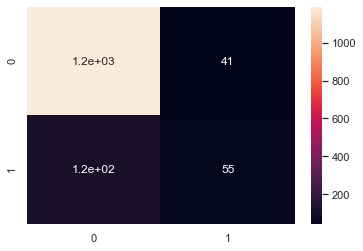

In [55]:
# creating Randomforest classifier
rf=RandomForestClassifier()
#fitting the model to train data 
rf_fit=rf.fit(x_train,y_train)
#predict the the x_test values to the 
rf_pred=rf.predict(x_test)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,rf_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# classification report 
print("Classification report:\n",classification_report (rf_pred,y_test))

In [56]:
rf_model_vales=dict(accuracy=accuracy_score(rf_pred,y_test)*100,Auc_score=roc_auc_score(rf_pred,y_test)*100
                   ,recall=recall_score(rf_pred,y_test),
                   precision=precision_score(rf_pred,y_test),

                    f1_score=f1_score(rf_pred,y_test))

[17:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1308
           1       0.34      0.62      0.44        93

    accuracy                           0.89      1401
   macro avg       0.66      0.77      0.69      1401
weighted avg       0.93      0.89      0.91      1401



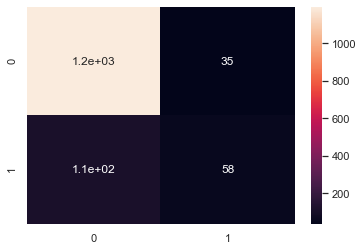

In [57]:
# creating xg classifier
xg=XGBClassifier()
#fitting the model to train data 
xg_fit=xg.fit(x_train,y_train)
#predict the the x_test values to the 
xg_pred=xg.predict(x_test)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,xg_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# classification report 
print("Classification report:\n",classification_report (xg_pred,y_test))

In [58]:
xg_model_vales=dict(accuracy=accuracy_score(xg_pred,y_test)*100,Auc_score=roc_auc_score(xg_pred,y_test)*100
                   ,recall=recall_score(xg_pred,y_test),
                   precision=precision_score(xg_pred,y_test),

                    f1_score=f1_score(xg_pred,y_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93      1399
           1       0.01      0.50      0.01         2

    accuracy                           0.88      1401
   macro avg       0.50      0.69      0.47      1401
weighted avg       1.00      0.88      0.93      1401



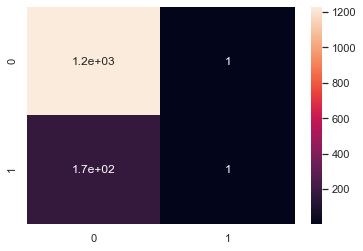

In [60]:
#creating SVM classifer 
svc=SVC()
#fitting the model to train data 
svc_fit=svc.fit(x_train,y_train)
#predict the the x_test values to the 
svc_pred=svc.predict(x_test)
#buiding a confusion matrix 
cnf_matrix=metrics.confusion_matrix(y_test,svc_pred)
# creating a heat map to the confusion matrix 
df=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
# classification report 
print("Classification report:\n",classification_report (svc_pred,y_test))

In [61]:
svc_model_vales=dict(accuracy=accuracy_score(svc_pred,y_test)*100,Auc_score=roc_auc_score(svc_pred,y_test)*100
                   ,recall=recall_score(svc_pred,y_test),
                   precision=precision_score(svc_pred,y_test),

                    f1_score=f1_score(svc_pred,y_test))

In [62]:
Model_performance=pd.DataFrame(data=[lr_model_vales,nv_model_vales,rf_model_vales,
                                    xg_model_vales,svc_model_vales],index=["linearRegression","Navi_byes","RandomForest",
                                                                           "XGboost","SupportVectorMachines"])


In [63]:
Model_performance

,accuracy,Auc_score,recall,precision,f1_score
linearRegression,87.723055,43.892857,0.000000,0.000000,0.000000
Navi_byes,87.366167,63.376224,0.384615,0.058480,0.101523
RandomForest,88.793719,74.201389,0.572917,0.321637,0.411985
XGboost,89.436117,76.863224,0.623656,0.339181,0.439394
SupportVectorMachines,87.794433,68.924232,0.500000,0.005848,0.011561


<AxesSubplot:>

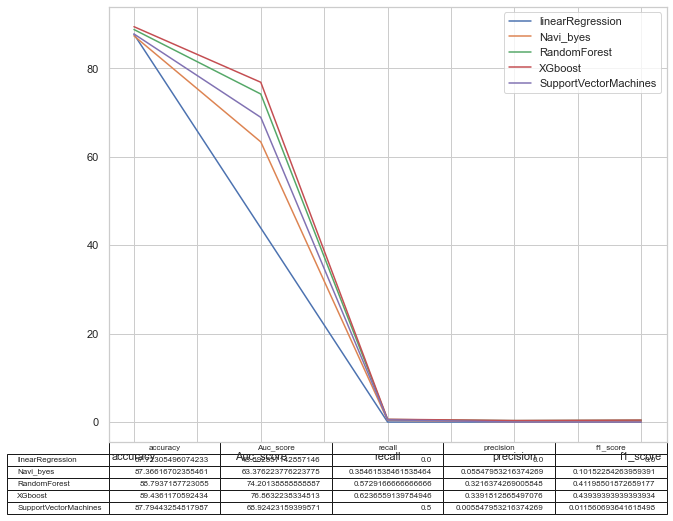

In [70]:
Model_performance.T.plot(kind="line",table=True,figsize=(10,8))

In [ ]:
# All the scores above taken directly from the model with out hyperparameter tuning 
# accuracy and precision and recall scores can be incresed with the tuning the parameters 